In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [3]:
# Load the dataset
df = pd.read_csv('skin.csv')  


In [4]:
print("Dataset Shape:", df.shape)
print("Dataset Info:\n", df.info())
print("First Few Rows:\n", df.head())

Dataset Shape: (366, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history           

In [5]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_s

In [6]:
print("Target Class Distribution:\n", df['class'].value_counts())  

Target Class Distribution:
 class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64


In [7]:
print("Column Names in Dataset:", df.columns)


Column Names in Dataset: Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')


In [8]:

df.replace("?", np.nan, inplace=True)

for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')


In [9]:
# Split features and target
X = df.drop(columns=['class'])
y = df['class']

X.fillna(X.median(), inplace=True)

print(X.dtypes)


erythema                                      int64
scaling                                       int64
definite_borders                              int64
itching                                       int64
koebner_phenomenon                            int64
polygonal_papules                             int64
follicular_papules                            int64
oral_mucosal_involvement                      int64
knee_and_elbow_involvement                    int64
scalp_involvement                             int64
family_history                                int64
melanin_incontinence                          int64
eosinophils_in_the_infiltrate                 int64
PNL_infiltrate                                int64
fibrosis_of_the_papillary_dermis              int64
exocytosis                                    int64
acanthosis                                    int64
hyperkeratosis                                int64
parakeratosis                                 int64
clubbing_of_

In [10]:
df.replace("Nan", np.nan, inplace=True)

for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

X = df.drop(columns=['class'])
y = df['class']

X.fillna(X.median(), inplace=True)

print(X.dtypes)


erythema                                      int64
scaling                                       int64
definite_borders                              int64
itching                                       int64
koebner_phenomenon                            int64
polygonal_papules                             int64
follicular_papules                            int64
oral_mucosal_involvement                      int64
knee_and_elbow_involvement                    int64
scalp_involvement                             int64
family_history                                int64
melanin_incontinence                          int64
eosinophils_in_the_infiltrate                 int64
PNL_infiltrate                                int64
fibrosis_of_the_papillary_dermis              int64
exocytosis                                    int64
acanthosis                                    int64
hyperkeratosis                                int64
parakeratosis                                 int64
clubbing_of_

In [11]:
# Splitting features and target
X = df.drop(columns=['class']) 
y = df['class']


X.fillna(X.median(), inplace=True)



In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance
feature_importances = pd.DataFrame({'Feature': df.columns[:-1], 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)



Accuracy: 0.9727272727272728
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        34
           2       0.94      0.89      0.91        18
           3       1.00      1.00      1.00        22
           4       0.88      0.93      0.90        15
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00         6

    accuracy                           0.97       110
   macro avg       0.97      0.97      0.97       110
weighted avg       0.97      0.97      0.97       110

Confusion Matrix:
 [[34  0  0  0  0  0]
 [ 0 16  0  2  0  0]
 [ 0  0 22  0  0  0]
 [ 0  1  0 14  0  0]
 [ 0  0  0  0 15  0]
 [ 0  0  0  0  0  6]]


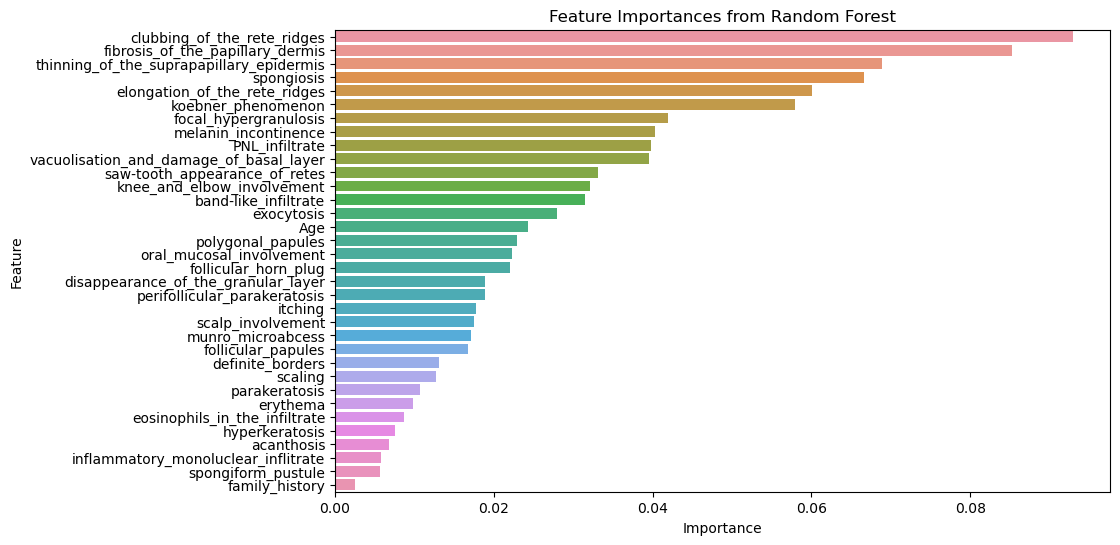

In [14]:
# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from Random Forest')
plt.show()

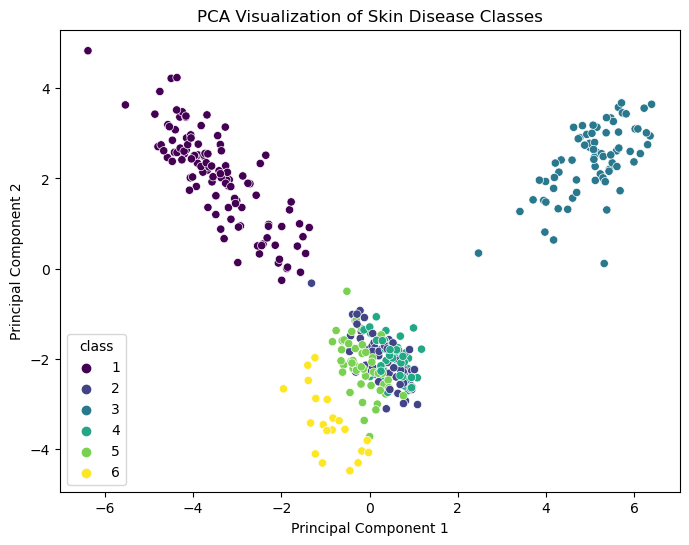

In [16]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title('PCA Visualization of Skin Disease Classes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

